## 2. The Kalman Filter

### 2a.  Tracking in 2D.  (30pts)
Imagine that we are monitoring the position of an aircraft, moving according to a so-called *constant velocity* model, in which:
$$
x_{t+1} = x_t + \Delta t u_t + \frac{\Delta t^2}{2} a_x^2
$$
$$
y_{t+1} = y_t + \Delta t v_t + \frac{\Delta t^2}{2} a_y^2
$$
$$
u_{t+1} = u_t + \Delta t a_x
$$
$$
v_{t+1} = v_t + \Delta t a_y,
$$
where $x$ and $y$ are the spatial coordinates in the map-plane (measured in km), $u$ and $v$ are the corresponding velocities measured in (km/s), and $a_x$ and $a_y$ are random accelerations due to buffeting by winds that are independent from one another.  $\Delta t=0.1 \mathrm{s}$ is the measurement interval, and the time step involved in computing the evolution of the aircraft state.   

Defining $\mathbf{z}_t=[x_t,u_t,y_t,v_t]$, we can write this model as
$$
\mathbf{z}_{t+1} = \mathbf{A}_t \mathbf{z}_t + \mathbf{\epsilon}_t,
$$
where $A$ is a *state transition matrix* given by
$$
\mathbf{A}_t = \begin{bmatrix} 1 & \Delta t & 0 & 0 \\
                    0 & 1 & 0 & 0  \\
                    0 & 0 & 1 & \Delta t \\
                    0 & 0 & 0 & 1 \end{bmatrix}.
$$

We assume that $\mathbf{\epsilon}_t = [\frac{\Delta t^2}{2} a_x^2, \Delta t a_x, \frac{\Delta t^2}{2} a_y^2, \Delta t a_y] \sim \mathcal{N}(0,\mathbf{Q}_t)$ is Gaussian noise with a zero mean, and $\mathbf{Q}_t$ is the covariance matrix
$$
\mathbf{Q}_t = a^2 \begin{bmatrix} 1/4 \Delta t^4 & 1/2\Delta t^3 & 0 &         0 \\
                        1/2 \Delta t^3 & \Delta t^2    & 0 &         0 \\
                        0 & 0 & 1/4 \Delta t^4 & 1/2\Delta t^3 \\
                        0 & 0 & 1/2 \Delta t^3 & \Delta t^2    \end{bmatrix},
$$
where $a=0.1 \mathrm{km/s}^2$ is a characteristic acceleration due to buffeting winds.

A global positioning unit fixed to the hull measures the coordinates $x$ and $y$.  At a fixed interval $\Delta t$ the unit returns an observation $\mathbf{y}_t = \mathbf{C}_t \mathbf{z}_t + \mathbf{\delta}_t$, where
$$
\mathbf{C}_t = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                    0 & 0 & 1 & 0 \end{bmatrix}
$$
is the observation matrix, mapping the state variables to observations (essentially picking out the positions and ignoring the velocities since these are not directly measured) and $\mathbf{\delta}_t \sim \mathcal{N}(0,\mathbf{R}_t)$ is Gaussian observation noise with $\mathbf{R}_t$ the observation covariance
$$
R_t = \begin{bmatrix} 0.05^2 & 0 \\
                           0 & 0.05^2 \end{bmatrix},
$$
indicating that positions are observed with a standard deviation of 0.05 km.

We seek the posterior probability distribution of states $P(\mathbf{z}_t|\mathbf{y}_{1:t}) = \mathcal{N}(\mu_t,\Sigma_t)$ having made measurements up to and including the current time.  This distribution combines our knowledge of the aircraft motion with our observations, both of which are imperfect due to randomness in the physical process (random winds) and in the observation process (measurement error).  The Kalman filter provides a recursive formula to find the distribution mean $\mu_t$ and covariance $\Sigma_t$.

Apply the Kalman filter to the aircraft motion and resulting observations simulated below.  After applying the filter, **generate a plot of the true aircraft positions, the observations, and the position estimates generated by filtering**.  **Report both the final and initial covariance matrices, and describe whether our state estimates are becoming more or less certain as filtering proceeds.**

In [1]:
import numpy as np
from numpy import dot
import matplotlib
import matplotlib.pyplot as plt
# Constants
a = 0.1   # Acceleration due to wind
dt = 0.1  # Interval for measurements

# Transition matrix
A = np.array([[1.0,dt,0.0,0.0],
              [0.0,1.0,0.0,0],
              [0.0,0.0,1.0,dt],
              [0.0,0.0,0,1.0]])

# Process noise covariance
Q = a**2*np.array([[1/4.*dt**4,1/2.*dt**3,         0,         0],
                   [1/2.*dt**3,     dt**2,         0,         0],
                   [         0,         0,1/4.*dt**4,1/2.*dt**3],
                   [         0,         0,1/2.*dt**3,     dt**2]])
# Observation matrix
C = np.array([[1,0,0,0],
              [0,0,1,0]])

# Observation covariance
R = np.array([[0.05**2,0],
              [0,0.05**2]])

### These are useful for sampling from normal distributions, but you
### don't need to worry about them.  
Q_cholesky = np.linalg.cholesky(Q)
R_cholesky = np.linalg.cholesky(R)
###A More Realistic Model
###https://home.wlu.edu/~levys/kalman_tutorial/
print (R_cholesky)

[[0.05 0.  ]
 [0.   0.05]]


In [2]:

### The true state of the aircraft
### You do not have access to this information!
###
Z_true = [np.array([-1,0.1,-1,0.1])]
###
###
###

# Initial guess for aircraft position and velocity
mu_initial = np.array([0,0,0,0])

# Covariance matrix for this initial guess of position and velocity 
Sigma_initial = np.eye(4)*np.diag(np.array([1,1,1,1]))

# Lists for holding estimated states
mu = [mu_initial]
Sigma = [Sigma_initial]
Y = []


t=0
t_end = 10.0 # I put this here ask about it 

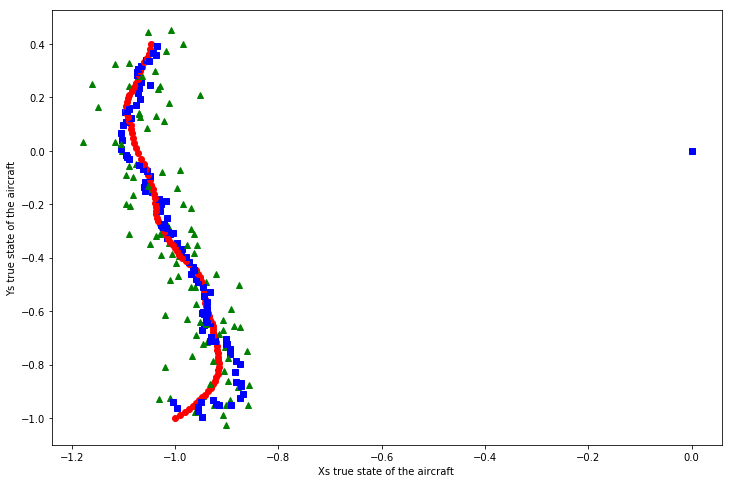

In [3]:




while t<t_end:
    
    ### Simulate the motion of the aircraft
    ### You do not have access to this information!
    ### Don't change!
    Z_0 = Z_true[-1]                                            
    Z_1 = np.dot(A,Z_0) + np.dot(Q_cholesky,np.random.randn(4))  # Move the plane forward in time
    Z_true.append(Z_1)
    Y_1 = np.dot(C,Z_1) + np.dot(R_cholesky,np.random.randn(2))  # Take a noisy measurement
    Y.append(Y_1)
    ###
    ###
    ###
    
    mu_previous = mu[-1] # Best state mean estimate from last time step
    Sigma_previous = Sigma[-1] # state covariance from last time step
    Y_current = Y[-1]  # Current observation
    
    # Prediction step
    #! Write code to predict
    #μt|t−1 = At . μt−1 + Bt . ut
    mu_prior = np.dot(A,mu_previous) #+ np.dot(B,u) #! a) where the airplane will be according to the motion model
    #Σt|t−1 = At . Σt−1 . ATt + Qt  
    Sigma_prior = np.dot(A,np.dot(Sigma_previous,A.T)) + Q  #! b) b) the covariance of that estimate
   
    # Update step
    #! Implement the formulae for the update step of the Kalman filter
    
    # St = Ct . Σt|t−1 . CTt + Rt
    St = np.dot (C ,np.dot ( Sigma_prior, C.T ) ) + R
    #  Kt = Σt|t−1 CTt S^−1
    Kt = np.dot (np.dot(Sigma_prior ,C.T  ), np.linalg.inv(St) )
    #ŷt = Ct μt|t−1 
    Y_hat = np.dot (C , mu_prior)
    rt = Y_current - Y_hat
    #!
    #!
    # μt = μt|t−1 + Kt rt
    mu_post = mu_prior + np.dot  (Kt , rt) #! The posterior state mean estimate
    # Σ t = (I − Kt Ct ) Σt|t−1
    Sigma_post = np.dot ( np.eye(4) - np.dot ( Kt , C ) ,Sigma_prior) #! The posterior covariance estimate  ___ 
    
    mu.append(mu_post) 
    Sigma.append(Sigma_post) 
    
    t+=dt
#for i in Sigma:
#    print (i)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12,8]

for i,j,m in zip(Z_true,Y ,mu):
    lines = plt.plot( i[0],i[2] , 'ro')
    plt.setp(lines, color='r', linewidth=0.1)
    lines = plt.plot( j[0],j[1] ,  'g^')
    plt.setp(lines, color='g', linewidth=0.1)
    
    lines = plt.plot( m[0],m[2] ,  'bs')
    plt.setp(lines, color='b', linewidth=0.1)

    
   
    
#! Plotting goes here.
plt.xlabel('Xs true state of the aircraft ')
plt.ylabel('Ys true state of the aircraft')
plt.show()

describe whether our state estimates are becoming more or less certain as filtering procedures?
as we can see the plotting our state estimates are becoming more certain as the filtering procedures. The blue square becomes nearer the true state of the aircraft motion. and we start to give better estimates 

### 2b (\*) Extended Kalman Filter. (20pts)
The Kalman filter only applies to observation models that are linear.  However, this is a restrictive assumption.  Consider the case where instead of tracking the plane with a GPS, we are tracking it with a radar, where the radar provides an estimate of range ($\rho_t$) and angle ($\theta_t$).  Assuming that the radar is located at $(x=0,y=0)$, the process of taking an observation then is:
$$
\mathbf{y}_t = h(\mathbf{z}_t) + \mathbf{g}_t
$$
where $h(\mathbf{z}_t)$ is the transformation from Cartesian to Polar coordinates
$$ h(\mathbf{z}_t) = \left[ \rho_t(\mathbf{z}_t), \theta_t(\mathbf{z_t})\right] = \left[\sqrt{x_t^2 + y_t^2},\mathrm{arctan2}(y_t,x_t)\right]. $$

An extended Kalman filter works by linearizing the observation process, which is to say that every time we see the product $\mathbf{C}_t\mathbf{z_t}$ in the Kalman filter algorithm, we replace it with $h(\mathbf{z_t})$, and every time we see $\mathbf{C}_t$ on its own, we replace it with the **Jacobian matrix** $H_{jac}(\mathbf{z}_t)$, which is given by
$$
H_{jac}(\mathbf{z}_t) = \begin{bmatrix} \frac{\partial \rho_t}{\partial x_t} & \frac{\partial \rho_t}{\partial u_t} & \frac{\partial \rho_t}{\partial y_t} & \frac{\partial \rho_t}{\partial v_t} \\
                          \frac{\partial \theta_t}{\partial x_t} & \frac{\partial \theta_t}{\partial u_t} & \frac{\partial \theta_t}{\partial y_t} & \frac{\partial \theta_t}{\partial v_t}
                          \end{bmatrix}
$$
Compute this Jacobian matrix and alter your Kalman Filter code to **implement the Extended Kalman Filter. Produce the same plots as in the previous section.**

Note that the code skeleton produces observations that are now in terms of $\rho_t$ and $\theta_t$ and the observational covariance $\mathbf{R}$ has been altered to account for the different magnitude of errors in these values.  Also note that **the complete EKF equations are given (in somewhat altered notation) in Murphy Eqs. 18.85-18.92.**



In [15]:
import numpy as np

# Constants
a = 0.1   # Acceleration due to wind
dt = 0.1  # Interval for measurements

# Transition matrix
A = np.array([[1.0,dt,0.0,0.0],
              [0.0,1.0,0.0,0],
              [0.0,0.0,1.0,dt],
              [0.0,0.0,0,1.0]])

# Process noise covariance
Q = a**2*np.array([[1/4.*dt**4,1/2.*dt**3,         0,         0],
                   [1/2.*dt**3,     dt**2,         0,         0],
                   [         0,         0,1/4.*dt**4,1/2.*dt**3],
                   [         0,         0,1/2.*dt**3,     dt**2]])


# Observation covariance
R = np.array([[0.1**2,0],
              [0,0.01**2]])

# Observation function
def h(X):
   
    R = np.sqrt(X[0]**2 + X[2]**2)
    theta = np.arctan2(X[2],X[0])
    return np.array([R,theta])

# Jacobian of observation function
def H_jac(X):
    #! Generate a function which returns the Jacobian of h
    # h_jac = [[(∂ρt/∂xt),(∂ρt/∂ut),(∂ρt/∂yt),(∂ρt/∂vt)]
    #         ,[(∂θt/∂xt),(∂θt/∂ut),(∂θt/∂yt),(∂θt/∂vt)]]
    
    R = np.sqrt(X[0]**2 + X[2]**2)
    print R
    theta = np.arctan2(X[2],X[0])
    # ∂ρt/∂xt = x/ρ and ∂ρt/∂yt = y/ρ
    # ∂θt/∂xt = 1/(1+x^2) ,  ∂θt/∂yt = 1/(1+y^2) 
    h_jac = np.array([[(X[0]/R)       ,0 ,(X[2]/R)        ,0],
                      [(1/(1+X[0]**2)),0 ,(1/(1+X[2]**2)) ,0]])
    return h_jac

### These are useful for sampling from normal distributions, but you
### don't need to worry about them.  
Q_cholesky = np.linalg.cholesky(Q)
R_cholesky = np.linalg.cholesky(R)

### The true state of the aircraft
### You do not have access to this information!
###
Z_true = [np.array([-1,0.1,-1,0.1])]
###
###
###

# Initial guess for aircraft position and velocity
mu_initial = np.array([-1.0,0.1,-1.0,0.1])

# Covariance matrix for this initial guess of position and velocity 
Sigma_initial = np.eye(4)*1#np.diag(np.array([1,1,1,1]))

# Lists for holding estimated states
mu = [mu_initial]
Sigma = [Sigma_initial]
Y = []



1.4142135623730951
[[-0.70710678  0.         -0.70710678  0.        ]
 [ 0.5         0.          0.5         0.        ]]


1.4142135623730951
1.413479774281583
1.4173595690382095
1.4443678931503021
1.4538998291899181
1.4699442471194881
1.485323292825534
1.5045535997861754
1.5179172942404857
1.5290493088856665
1.5297791718009848
1.5388935330508435
2.161467668398392
7.79165473999941
5.270924269212318
2.5957809376263663
6.183693158219734
4.964267048809139
4.645653245844975
4.695450087921612
4.91849198861666
5.285532252609137
5.973295045987288
7.08192005219987
6.1427235234865565
6.231404429409704
6.195143323833828
6.069773047949179
5.901003025514041
5.798387687937748
5.678338008779971
5.65051371938545
5.635589533991048
5.6121120574656915
5.614341282807177
5.630019082589878
5.596529648898043
5.55484110712106
5.478542264412169
5.368805278773629
5.241663583459505
5.087172415832942
4.907495428779624
4.750785797016911
4.586806779910256
4.409862767130743
4.23921074407941
4.124733999778643
4.029003389089463
3.9568875906056924
3.9145378723911595
3.8976638627857696
3.922506083811952
3.955055063328499
4.0216678204492196

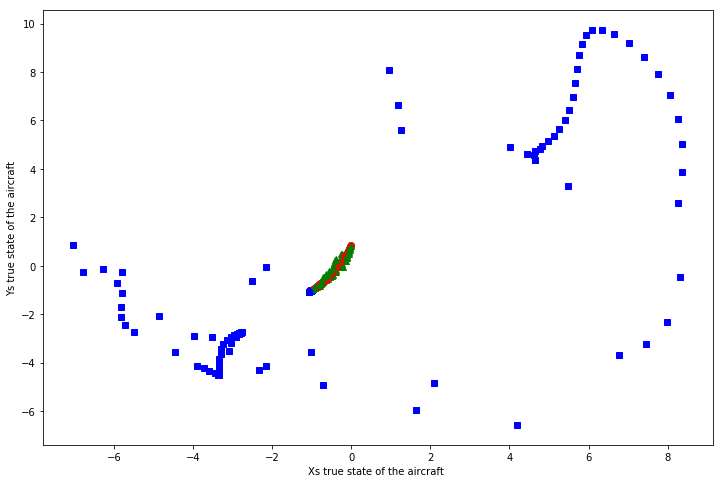

In [16]:
t=0
t_end = 10.0
while t<t_end:
    
    ### Simulate the motion of the aircraft
    ### You do not have access to this information!
    ### Don't change!
    Z_0 = Z_true[-1]                                            
    Z_1 = np.dot(A,Z_0) + np.dot(Q_cholesky,np.random.randn(4))  # Move the plane forward in time
    Z_true.append(Z_1)
    Y_1 = h(Z_1) + np.dot(R_cholesky,np.random.randn(2))  # Take a noisy measurement
    Y.append(Y_1)
    ###
    ###
    ###
    
    mu_previous = mu[-1] # Best state estimate from last time step
    Sigma_previous = Sigma[-1] # state covariance from last time step
    Y_current = Y[-1]  # Current observation
    
    H = H_jac(mu_previous)
    
    # Prediction step
    #! Write code to predict
    
    mu_prior = np.dot(A,mu_previous) # + (Bt . ut) this here is Zreo  #! a) where the airplane will be according 
    
    Sigma_prior = np.dot(A,np.dot(Sigma_previous,A.T)) + Q #! b) b) the covariance of that estimate
   
    # Update step
    #! Implement the formulae for the update step of the Kalman filter
    
    St = np.dot (H ,np.dot ( Sigma_prior, H.T ) ) + R
    
    Kt = np.dot (np.dot(Sigma_prior ,H.T  ), np.linalg.inv(St) )
    
    Y_hat = h(mu_prior)
    rt = Y_current - Y_hat
    #!
    #!
    mu_post = mu_prior + np.dot  (Kt , rt) #! The posterior state mean estimate
    Sigma_post = np.dot ( np.eye(4) - np.dot ( Kt , H ) ,Sigma_prior) #! The posterior covariance estimate  ___ 
    mu.append(mu_post)
    Sigma.append(Sigma_post)
    t+=dt
#---------------------------
mpl.rcParams['figure.figsize'] = [12,8]
for i,j,m in zip(Z_true,Y,mu ):# i,j,m in zip(Z_true,Y ,mu):
    lines = plt.plot( i[0],i[2] , 'ro')
    plt.setp(lines, color='r', linewidth=0.1)
    # x = distance . cosine theta
    x = j[0] * np.cos(j[1]) 
    # y = distance . sine theta
    y = j[0] * np.sin(j[1]) 
    lines = plt.plot( x,y,  'g^')
    plt.setp(lines, color='g', linewidth=0.1)
    
    lines = plt.plot( m[0],m[2] ,  'bs')
    plt.setp(lines, color='b', linewidth=0.1)
#! Plotting goes here.
plt.xlabel('Xs true state of the aircraft ')
plt.ylabel('Ys true state of the aircraft')
plt.show()